In [37]:
import numpy as np
import math
from gradnet import Model, Input
from gradnet.layers import Dense
from gradnet.losses import get_loss, Loss
from gradnet.optimizers import get_optimizer
from gradnet.metrics import get_metric

np.set_printoptions(suppress=True, precision=4)


In [38]:
from matplotlib import pyplot
%matplotlib inline

In [44]:
class EntropyLoss(Loss):
    
    def __init__(self, *inputs, q=0.01, **args):
        import math
        Loss.__init__(self, *inputs, **args)
        assert len(self.Inputs) == 1
        N = self.Inputs[0].Shape[-1]
        p = 1.0 - (N-1)*q
        assert p > q, f"The target q value for the EntropyLoss ({q}) is too high for the number of dimensions ({N})"
        self.K = 1.0/(p*math.log(q/p))
        self.LogN = math.log(N)

    def compute(self, data):
        probs = self.Inputs[0].Y
        #print("Entropy loss: probs:", probs)
        p = np.clip(probs, 1e-5, None)
        values = -np.sum(p*np.log(p), axis=-1)
        grads = np.log(p)+1.0
        n = probs.shape[-1]
        self.Grads = [grads*self.K]
        self.Values = values/self.LogN
        return self.value


In [40]:
class _EntropyLoss(Loss):
    
    def __init__(self, *inputs, q=0.01, **args):
        import math
        Loss.__init__(self, *inputs, **args)
        self.Q = q

    def compute(self, data):
        probs = self.Inputs[0].Y
        mask = probs < self.Q
        d = (probs - self.Q)*mask
        self.Values = np.sum(d**2, axis=-1)
        self.Grads = [2*d]
        return self.value


In [45]:
def create_model(nin, nout, entropy_weight):
    inp = Input((nin,))
    hidden = Dense(100, activation="relu")(inp)
    probs = Dense(nout, activation="softmax")(hidden)
    model = Model(inp, probs)
    entropy = EntropyLoss(probs, q=0.1)
    cce = get_loss("cce")(probs)
    model.add_loss(entropy, entropy_weight, name="entropy")
    model.add_loss(cce, name="cce")
    model.compile(get_optimizer("adagrad", learning_rate=0.01), metrics=[get_metric("accuracy")])
    
    model["cce"] = cce
    model["entropy"] = entropy
    
    return model

accuracy = get_metric("accuracy")

In [48]:
nin = 5
nout = 2
w = 1.0
mb = 1
y_ = np.zeros((mb, nout))
y_[:,0] = 0.9
y_[:,1] = 0.1
model=create_model(nin, nout, w)
record = []
ma = np.array([0,0])

Loss grads: cce: [[-1.9029 -0.1897]]    entropy: [array([[-0.1271, -0.1818]])]
Loss grads: cce: [[-1.0647 -0.6464]]    entropy: [array([[-0.4207,  0.4381]])]
Loss grads: cce: [[-0.9668 -1.4468]]    entropy: [array([[-0.4695,  0.8455]])]
Loss grads: cce: [[-0.9789 -1.2414]]    entropy: [array([[-0.4632,  0.768 ]])]
Loss grads: cce: [[-0.9362 -2.5862]]    entropy: [array([[-0.4857,  1.1392]])]
Loss grads: cce: [[-0.9235 -3.9324]]    entropy: [array([[-0.4927,  1.3511]])]
Loss grads: cce: [[-0.9619 -1.5533]]    entropy: [array([[-0.472 ,  0.8814]])]
Loss grads: cce: [[-0.9324 -2.8741]]    entropy: [array([[-0.4878,  1.1926]])]
Loss grads: cce: [[-0.9311 -2.9976]]    entropy: [array([[-0.4885,  1.2138]])]
Loss grads: cce: [[-0.9436 -2.1636]]    entropy: [array([[-0.4818,  1.049 ]])]
Loss grads: cce: [[-0.9332 -2.8149]]    entropy: [array([[-0.4874,  1.1821]])]
Loss grads: cce: [[-0.964  -1.5068]]    entropy: [array([[-0.471,  0.866]])]
Loss grads: cce: [[-0.9355 -2.636 ]]    entropy: [arra

Loss grads: cce: [[-0.9289 -3.2181]]    entropy: [array([[-0.4897,  1.2497]])]
Loss grads: cce: [[-0.9221 -4.1686]]    entropy: [array([[-0.4934,  1.3806]])]
Loss grads: cce: [[-0.9322 -2.8941]]    entropy: [array([[-0.4879,  1.1961]])]
Loss grads: cce: [[-0.9314 -2.9695]]    entropy: [array([[-0.4884,  1.2091]])]
Loss grads: cce: [[-0.9302 -3.0834]]    entropy: [array([[-0.489 ,  1.2281]])]
Loss grads: cce: [[-0.9321 -2.9006]]    entropy: [array([[-0.4879,  1.1972]])]
Loss grads: cce: [[-0.9263 -3.5207]]    entropy: [array([[-0.4911,  1.2952]])]
Loss grads: cce: [[-0.9328 -2.8404]]    entropy: [array([[-0.4876,  1.1866]])]
Loss grads: cce: [[-0.9465 -2.0356]]    entropy: [array([[-0.4802,  1.0181]])]
Loss grads: cce: [[-0.9414 -2.2745]]    entropy: [array([[-0.483 ,  1.0743]])]
Loss grads: cce: [[-0.9376 -2.4935]]    entropy: [array([[-0.485 ,  1.1207]])]
Loss grads: cce: [[-0.934  -2.7479]]    entropy: [array([[-0.4869,  1.1699]])]
Loss grads: cce: [[-0.9491 -1.9317]]    entropy: [ar

Loss grads: cce: [[-0.9356 -2.6253]]    entropy: [array([[-0.486 ,  1.1468]])]
Loss grads: cce: [[-0.9331 -2.8172]]    entropy: [array([[-0.4874,  1.1825]])]
Loss grads: cce: [[-0.9381 -2.4592]]    entropy: [array([[-0.4847,  1.1137]])]
Loss grads: cce: [[-0.9369 -2.5398]]    entropy: [array([[-0.4854,  1.13  ]])]
Loss grads: cce: [[-0.9367 -2.5491]]    entropy: [array([[-0.4855,  1.1319]])]
Loss grads: cce: [[-0.9372 -2.5168]]    entropy: [array([[-0.4852,  1.1255]])]
Loss grads: cce: [[-0.937  -2.5318]]    entropy: [array([[-0.4853,  1.1285]])]
Loss grads: cce: [[-0.9398 -2.3617]]    entropy: [array([[-0.4838,  1.0933]])]
Loss grads: cce: [[-0.9345 -2.7121]]    entropy: [array([[-0.4867,  1.1632]])]
Loss grads: cce: [[-0.9406 -2.3153]]    entropy: [array([[-0.4834,  1.0833]])]
Loss grads: cce: [[-0.9411 -2.2902]]    entropy: [array([[-0.4831,  1.0777]])]
Loss grads: cce: [[-0.9358 -2.6122]]    entropy: [array([[-0.4859,  1.1443]])]
Loss grads: cce: [[-0.9377 -2.4904]]    entropy: [ar

Loss grads: cce: [[-0.9372 -2.5223]]    entropy: [array([[-0.4852,  1.1265]])]
Loss grads: cce: [[-0.9389 -2.4154]]    entropy: [array([[-0.4843,  1.1046]])]
Loss grads: cce: [[-0.9358 -2.6111]]    entropy: [array([[-0.4859,  1.144 ]])]
Loss grads: cce: [[-0.9386 -2.4331]]    entropy: [array([[-0.4845,  1.1083]])]
Loss grads: cce: [[-0.9372 -2.5186]]    entropy: [array([[-0.4852,  1.1258]])]
Loss grads: cce: [[-0.9379 -2.4719]]    entropy: [array([[-0.4848,  1.1163]])]
Loss grads: cce: [[-0.9363 -2.5778]]    entropy: [array([[-0.4857,  1.1376]])]
Loss grads: cce: [[-0.9367 -2.5512]]    entropy: [array([[-0.4855,  1.1323]])]
Loss grads: cce: [[-0.9372 -2.5221]]    entropy: [array([[-0.4852,  1.1265]])]
Loss grads: cce: [[-0.9381 -2.4635]]    entropy: [array([[-0.4847,  1.1146]])]
Loss grads: cce: [[-0.9378 -2.4797]]    entropy: [array([[-0.4849,  1.1179]])]
Loss grads: cce: [[-0.9357 -2.6184]]    entropy: [array([[-0.486 ,  1.1455]])]
Loss grads: cce: [[-0.9383 -2.447 ]]    entropy: [ar

Loss grads: cce: [[-0.9373 -2.5125]]    entropy: [array([[-0.4852,  1.1246]])]
Loss grads: cce: [[-0.9374 -2.5084]]    entropy: [array([[-0.4851,  1.1238]])]
Loss grads: cce: [[-0.9379 -2.4737]]    entropy: [array([[-0.4848,  1.1167]])]
Loss grads: cce: [[-0.9374 -2.5037]]    entropy: [array([[-0.4851,  1.1228]])]
Loss grads: cce: [[-0.9373 -2.5145]]    entropy: [array([[-0.4852,  1.125 ]])]
Loss grads: cce: [[-0.9376 -2.4961]]    entropy: [array([[-0.485 ,  1.1213]])]
Loss grads: cce: [[-0.9365 -2.5682]]    entropy: [array([[-0.4856,  1.1357]])]
Loss grads: cce: [[-0.9366 -2.5614]]    entropy: [array([[-0.4856,  1.1343]])]
Loss grads: cce: [[-0.9362 -2.5829]]    entropy: [array([[-0.4857,  1.1386]])]
Loss grads: cce: [[-0.9361 -2.5916]]    entropy: [array([[-0.4858,  1.1402]])]
Loss grads: cce: [[-0.9365 -2.5661]]    entropy: [array([[-0.4856,  1.1353]])]
Loss grads: cce: [[-0.9344 -2.7163]]    entropy: [array([[-0.4867,  1.164 ]])]
Loss grads: cce: [[-0.937  -2.5353]]    entropy: [ar

Loss grads: cce: [[-0.9377 -2.4874]]    entropy: [array([[-0.4849,  1.1195]])]
Loss grads: cce: [[-0.9363 -2.5786]]    entropy: [array([[-0.4857,  1.1377]])]
Loss grads: cce: [[-0.9341 -2.7413]]    entropy: [array([[-0.4869,  1.1687]])]
Loss grads: cce: [[-0.9375 -2.5021]]    entropy: [array([[-0.4851,  1.1225]])]
Loss grads: cce: [[-0.9372 -2.5166]]    entropy: [array([[-0.4852,  1.1254]])]
Loss grads: cce: [[-0.9362 -2.5848]]    entropy: [array([[-0.4857,  1.1389]])]
Loss grads: cce: [[-0.9352 -2.6574]]    entropy: [array([[-0.4863,  1.1529]])]
Loss grads: cce: [[-0.9352 -2.6588]]    entropy: [array([[-0.4863,  1.1532]])]
Loss grads: cce: [[-0.9357 -2.6181]]    entropy: [array([[-0.486 ,  1.1454]])]
Loss grads: cce: [[-0.9367 -2.5543]]    entropy: [array([[-0.4855,  1.1329]])]
Loss grads: cce: [[-0.9371 -2.5262]]    entropy: [array([[-0.4853,  1.1273]])]
Loss grads: cce: [[-0.9372 -2.5199]]    entropy: [array([[-0.4852,  1.1261]])]
Loss grads: cce: [[-0.9373 -2.5155]]    entropy: [ar

Loss grads: cce: [[-0.9385 -2.4373]]    entropy: [array([[-0.4845,  1.1092]])]
Loss grads: cce: [[-0.9365 -2.5638]]    entropy: [array([[-0.4856,  1.1348]])]
Loss grads: cce: [[-0.9362 -2.5892]]    entropy: [array([[-0.4858,  1.1398]])]
Loss grads: cce: [[-0.9362 -2.583 ]]    entropy: [array([[-0.4857,  1.1386]])]
Loss grads: cce: [[-0.9373 -2.5099]]    entropy: [array([[-0.4851,  1.1241]])]
Loss grads: cce: [[-0.9382 -2.457 ]]    entropy: [array([[-0.4847,  1.1133]])]
Loss grads: cce: [[-0.9367 -2.552 ]]    entropy: [array([[-0.4855,  1.1325]])]
Loss grads: cce: [[-0.9352 -2.6543]]    entropy: [array([[-0.4863,  1.1523]])]
Loss grads: cce: [[-0.9374 -2.5053]]    entropy: [array([[-0.4851,  1.1231]])]
Loss grads: cce: [[-0.9364 -2.5731]]    entropy: [array([[-0.4856,  1.1366]])]
Loss grads: cce: [[-0.9365 -2.563 ]]    entropy: [array([[-0.4856,  1.1346]])]
Loss grads: cce: [[-0.9367 -2.5492]]    entropy: [array([[-0.4855,  1.1319]])]
Loss grads: cce: [[-0.9354 -2.6449]]    entropy: [ar

Loss grads: cce: [[-0.9364 -2.5758]]    entropy: [array([[-0.4857,  1.1372]])]
Loss grads: cce: [[-0.9371 -2.5238]]    entropy: [array([[-0.4852,  1.1268]])]
Loss grads: cce: [[-0.9369 -2.5366]]    entropy: [array([[-0.4853,  1.1294]])]
Loss grads: cce: [[-0.9365 -2.5686]]    entropy: [array([[-0.4856,  1.1357]])]
Loss grads: cce: [[-0.937  -2.5339]]    entropy: [array([[-0.4853,  1.1289]])]
Loss grads: cce: [[-0.9367 -2.5521]]    entropy: [array([[-0.4855,  1.1325]])]
Loss grads: cce: [[-0.9375 -2.4985]]    entropy: [array([[-0.485 ,  1.1218]])]
Loss grads: cce: [[-0.9362 -2.5884]]    entropy: [array([[-0.4858,  1.1396]])]
Loss grads: cce: [[-0.9374 -2.5081]]    entropy: [array([[-0.4851,  1.1237]])]
Loss grads: cce: [[-0.9377 -2.4901]]    entropy: [array([[-0.485 ,  1.1201]])]
Loss grads: cce: [[-0.9368 -2.5446]]    entropy: [array([[-0.4854,  1.131 ]])]
Loss grads: cce: [[-0.9355 -2.6367]]    entropy: [array([[-0.4861,  1.149 ]])]
Loss grads: cce: [[-0.937  -2.5321]]    entropy: [ar

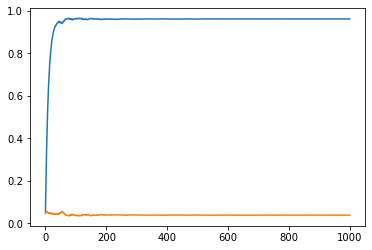

In [49]:


for t in range(10000):
    x = np.random.random((mb, nin))
    losses, metrics = model.fit(x, y_, metrics=[accuracy])
    if t % 10 == 0:
        #print("accuracy:", metrics[0], "  entropy:", losses["entropy"], "   cce:", losses["cce"])
        y = model.compute(x)[0]
        avg = np.mean(y, axis=0)
        p = avg[:2]
        ma = ma + 0.1*(p - ma)
        record.append(ma)
        
        print("Loss grads: cce:", model["cce"].Grads, "   entropy:", model["entropy"].Grads)

pyplot.plot(record)
print(ma)